In [1]:
# standard set of imports:

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# list all content in the folder
# ls drive/MyDrive/

IMG_3579.JPG  oryza_sativa_hisat2_raw.nc  sample_data/  Untitled


In [3]:
ds = xr.open_dataset("drive/MyDrive/oryza_sativa_hisat2_raw.nc")
ds

<xarray.Dataset>
Dimensions:             (Gene: 66338, Sample: 475)
Coordinates:
  * Sample              (Sample) object 'SRX1423934' ... 'SRX1424408'
  * Gene                (Gene) object 'LOC_Os01g01010.1' ... 'ChrSy.fgenesh.m...
Data variables: (12/29)
    BioSample           (Sample) object ...
    LoadDate            (Sample) object ...
    MBases              (Sample) int64 ...
    MBytes              (Sample) int64 ...
    Run                 (Sample) object ...
    SRA_Sample          (Sample) object ...
    ...                  ...
    Platform            (Sample) object ...
    ReleaseDate         (Sample) object ...
    SRA_Study           (Sample) object ...
    source_name         (Sample) object ...
    tissue              (Sample) object ...
    counts              (Sample, Gene) float64 ...
Attributes:
    __GSForge.AnnotatedGEM.params:  {"count_array_name": "counts", "gene_inde...

In [34]:
# get data array values
# ds['counts'].values

# get data shape
# ds['counts'].values.shape

# get data in one array
# ds['counts'].values.flatten()

# get maximum value
# ds['counts'].values.max()

# get the mean values
mean_log_counts = np.mean(np.log(ds['counts'].values + 1), axis=0)
mean_log_counts

array([6.0413828 , 2.78830294, 1.35210936, ..., 0.15839824, 0.72187436,
       0.01167406])

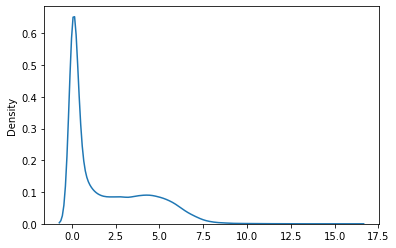

In [41]:
# Plot distributions using kernel density estimation
# sns.kdeplot(ds['counts'].values.flatten())

# Plot log distribution of data, plus 1 to avoid log of zero error
# sns.kdeplot(np.log(ds['counts'].values.flatten() + 1))

# Plot mean value distributions to run faster
sns.kdeplot(mean_log_counts);

In [50]:
log_counts = np.log(ds['counts'].values + 1)
log_counts

array([[6.54326415, 3.67503405, 2.07944154, ..., 0.        , 0.        ,
        0.        ],
       [5.32787617, 0.        , 1.09861229, ..., 0.        , 0.        ,
        0.        ],
       [6.57744681, 3.23073325, 2.19722458, ..., 0.        , 1.11112369,
        0.        ],
       ...,
       [6.33777926, 3.27565683, 0.        , ..., 0.89561444, 0.97273155,
        0.        ],
       [6.26997279, 3.77360885, 0.        , ..., 0.        , 0.69314718,
        0.        ],
       [6.27902036, 3.16690019, 0.69314718, ..., 1.02226026, 0.91310165,
        0.        ]])

In [51]:
log_counts.shape

(475, 66338)

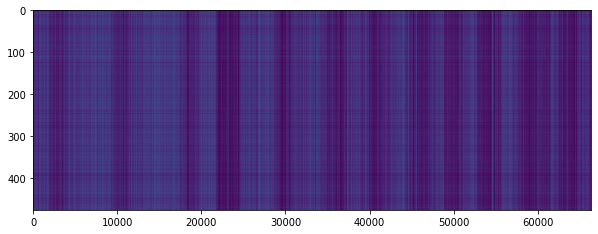

In [45]:
# Plot the array data
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(log_counts, aspect=50);

In [42]:
from sklearn.decomposition import PCA

In [46]:
# Perform the PCA analysis
pca_mdl = PCA()
log_count_pca = pca_mdl.fit_transform(log_counts)
log_count_pca

array([[ 4.94193784e+01, -8.02055769e+01, -8.80733398e-01, ...,
         8.74952237e-01, -8.08077470e-01,  5.06859694e-13],
       [-1.35402240e+02, -6.92758952e+01, -2.31051819e+00, ...,
        -3.71586320e+00, -2.76281757e+00,  5.06859694e-13],
       [ 6.17163455e+01, -7.58190350e+01,  4.36655143e+00, ...,
        -9.71126064e+00, -9.80230558e+00,  5.06859694e-13],
       ...,
       [ 6.13298003e+00,  5.83632396e+01,  3.87106718e+01, ...,
         4.02701994e+00, -8.51373151e+00,  5.06859694e-13],
       [ 8.42008347e+00,  7.55527711e+01,  5.05348195e+01, ...,
         1.46468556e+00, -1.19804637e+00,  5.06859694e-13],
       [ 2.19826396e+00,  7.15912515e+01,  4.36890001e+01, ...,
        -5.50834872e+00, -2.95311647e+00,  5.06859694e-13]])

In [48]:
log_count_pca.shape

(475, 475)

In [55]:
# Set labels from the dataset
labels = ds[['treatment', 'time', 'genotype']].to_dataframe()
print(labels.shape)
labels.head()

(475, 3)


,treatment,time,genotype
Sample,,,
SRX1423934,CONTROL,15,Azuenca
SRX1423935,CONTROL,15,Azuenca
SRX1423936,CONTROL,30,Azuenca
SRX1423937,CONTROL,30,Azuenca
SRX1423938,CONTROL,45,Azuenca


In [60]:
# Get the first two principal components
labels['pca_1'] = log_count_pca[:, 0]
labels['pca_2'] = log_count_pca[:, 1]
labels.head(2)
# fig, ax = plt.subplots()
# ax.scatter(x, y)

,treatment,time,genotype,pca_1,pca_2
Sample,,,,,
SRX1423934,CONTROL,15,Azuenca,49.419378,-80.205577
SRX1423935,CONTROL,15,Azuenca,-135.402240,-69.275895


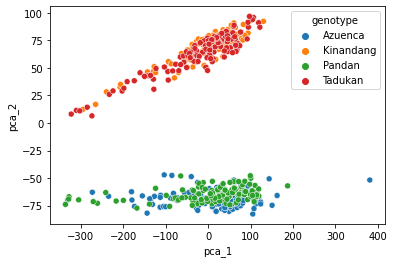

In [59]:
# Plot the PCA results with better configures
sns.scatterplot(data=labels, x='pca_1', y='pca_2', hue='genotype');

In [64]:
# Install the UMAP package
pip install umap-learn

SyntaxError: ignored

In [62]:
import umap

ModuleNotFoundError: ignored

In [ ]:
reducer = umap.UMAP()

In [ ]:
embedding = reducer.fit_transform(log_counts)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=42)
clf.fit(log_counts, labels['treatment'].values)

NameError: ignored

In [ ]:
clf.feature_importances_

In [ ]:
clf.score(log_counts, labels['treatment'].values)

In [ ]:
clf.feature_importances_.shape

In [ ]:
ds['Gene'].values[clf.feature_importances_ > 0]

In [ ]:
log_counts[:, clf.feature_importances_ > 0]